<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by [Nathan Kelber](http://nkelber.com) and Ted Lawless for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
For questions/comments/improvements, email nathan.kelber@ithaka.org.<br />
____
# Exploring Word Frequencies

**Description:**
This [notebook](https://docs.constellate.org/key-terms/#jupyter-notebook) shows how to find the most common words in a
[dataset](https://docs.constellate.org/key-terms/#dataset). The following processes are described:

* Using the `tdm_client` to create a Pandas DataFrame
* Filtering based on a pre-processed ID list
* Filtering based on a [stop words list](https://docs.constellate.org/key-terms/#stop-words)
* Using a `Counter()` object to get the most common words

**Use Case:** For Learners (Detailed explanation, not ideal for researchers)

[Take me to the **Research Version** of this notebook ->](./exploring-word-frequencies-for-research.ipynb)

**Difficulty:** Intermediate

**Completion time:** 60 minutes

**Knowledge Required:** 
* Python Basics ([Start Python Basics I](./python-basics-1.ipynb))

**Knowledge Recommended:**

* [Working with Dataset Files](./working-with-dataset-files.ipynb)
* [Pandas I](./pandas-1.ipynb)
* [Counter Objects](./counter-objects.ipynb)
* [Creating a Stopwords List](./creating-stopwords-list.ipynb)

**Data Format:** [JSON Lines (.jsonl)](https://docs.constellate.org/key-terms/#jsonl)

**Libraries Used:**
* **[tdm_client](https://docs.constellate.org/key-terms/#tdm-client)** to collect, unzip, and read our dataset
* **[NLTK](https://docs.constellate.org/key-terms/#nltk)** to help [clean](https://docs.constellate.org/key-terms/#clean-data) up our dataset
* [Counter](https://docs.constellate.org/key-terms/#python-counter) from **Collections** to help sum up our word frequencies

**Research Pipeline:**

1. Build a dataset
2. Create a "Pre-Processing CSV" with [Exploring Metadata](./exploring-metadata.ipynb) (Optional)
3. Create a "Custom Stopwords List" with [Creating a Stopwords List](./creating-stopwords-list.ipynb) (Optional)
4. Complete the word frequencies analysis with this notebook
___

## Import your dataset

We'll use the tdm_client library to automatically retrieve the dataset in the JSON file format. 

Enter a [dataset ID](https://docs.constellate.org/key-terms/#dataset-ID) in the next code cell.

If you don't have a dataset ID, you can:
* Use the sample dataset ID already in the code cell
* [Create a new dataset](https://constellate.org/builder)
* [Use a dataset ID from other pre-built sample datasets](https://constellate.org/dataset/dashboard)

In [27]:
# Creating a variable `dataset_id` to hold our dataset ID
# The default dataset is Shakespeare Quarterly, 1950-present
dataset_id = "7e41317e-740f-e86a-4729-20dab492e925"

Next, import the `tdm_client`, passing the `dataset_id` as an argument using the `get_dataset` method.

In [28]:
# Importing your dataset with a dataset ID
import tdm_client
# Pull in the dataset that matches `dataset_id`
# in the form of a gzipped JSON lines file.
# The .get_dataset() method downloads the gzipped JSONL file
# to the /data folder and returns a string for the file name and location
# dataset_metadata will be a string containing that file name and location
dataset_file = tdm_client.get_dataset(dataset_id)

INFO:root:Dataset file 7e41317e-740f-e86a-4729-20dab492e925.jsonl.gz exists. Not re-downloading.


## Apply Pre-Processing Filters (if available)
If you completed pre-processing with the "Exploring Metadata and Pre-processing" notebook, you can use your CSV file of dataset IDs to automatically filter the dataset. Your pre-processed CSV file should be in the /data directory.

In [29]:
# Import a pre-processed CSV file of filtered dataset IDs.
# If you do not have a pre-processed CSV file, the analysis
# will run on the full dataset and may take longer to complete.
import pandas as pd
import os

# Define a string that describes the path to the CSV
pre_processed_file_name = f'data/pre-processed_{dataset_id}.csv'

# Test if the path to the CSV exists
# If true, then read the IDs into filtered_id_list
if os.path.exists(pre_processed_file_name):
    df = pd.read_csv(pre_processed_file_name)
    filtered_id_list = df["id"].tolist()
    use_filtered_list = True
    print(f'Pre-Processed CSV found. Filtered dataset is ' + str(len(df)) + ' documents.')
else: 
    use_filtered_list = False
    print('No pre-processed CSV file found. Full dataset will be used.')

Pre-Processed CSV found. Filtered dataset is 2410 documents.


## Extract Unigram Counts from the JSON file (No cleaning)

We pulled in our dataset using a `dataset_id`. The file, which resides in the datasets/ folder, is a compressed JSON Lines file (jsonl.gz) that contains all the metadata information found in the metadata CSV *plus* the textual data necessary for analysis including:

* Unigram Counts
* Bigram Counts
* Trigram Counts
* Full-text (if available)

To complete our analysis, we are going to pull out the unigram counts for each document and store them in a Counter() object. We will import `Counter` which will allow us to use Counter() objects for counting unigrams. Then we will initialize an empty Counter() object `word_frequency` to hold all of our unigram counts.

In [30]:
# Import Counter()
from collections import Counter

# Create an empty Counter object called `word_frequency`
word_frequency = Counter()

We can read in each document using the tdm_client.dataset_reader. 

In [31]:
# Gather unigramCounts from documents in `filtered_id_list` if it is available

for document in tdm_client.dataset_reader(dataset_file):
    if use_filtered_list is True:
        document_id = document['id']
        # Skip documents not in our filtered_id_list
        if document_id not in filtered_id_list:
            continue
    unigrams = document.get("unigramCount", [])
    for gram, count in unigrams.items():
        word_frequency[gram] += count

# Print success message
if use_filtered_list is True:
    print('Unigrams have been collected only for the ' + str(len(df)) + ' documents listed in your CSV file.')
else:
    print('Unigrams have been collected for all documents without filtering from a CSV file.')

Unigrams have been collected only for the 2410 documents listed in your CSV file.


### Find Most Common Unigrams
Now that we have a list of the frequency of all the unigrams in our corpus, we need to sort them to find which are most common

In [32]:
for gram, count in word_frequency.most_common(25):
    print(gram.ljust(20), count)

the                  887510
of                   670477
and                  503770
in                   348645
to                   321483
a                    255840
is                   160372
that                 155717
by                   136430
as                   134390
for                  121715
The                  112310
his                  107095
with                 96688
on                   81178
was                  66632
at                   66497
he                   63045
not                  61779
from                 60962
it                   60646
be                   55343
Shakespeare          55085
an                   53174
this                 52453


### Some issues to consider

We have successfully created a word frequency list. There are a couple small issues, however, that we still need to address:
1. There are many [function words](https://docs.constellate.org/key-terms/#function-words), words like "the", "in", and "of" that are grammatically important but do not carry as much semantic meaning like [content words](https://docs.constellate.org/key-terms/#content-words), such as nouns and verbs.
2. The words represented here are actually case-sensitive [strings](https://docs.constellate.org/key-terms/#string). That means that the string "the" is a different from the string "The". You may notice this in your results above.



## Extract Unigram Counts from the JSON File (with cleaning)
To address these issues, we need to find a way to remove common [function words](https://docs.constellate.org/key-terms/#function-words) and combine [strings](https://docs.constellate.org/key-terms/#string) that may have capital letters in them. We can address these issues by:

1. Using a [stopwords](https://docs.constellate.org/key-terms/#stop-words) list to remove common [function words](https://docs.constellate.org/key-terms/#function-words)
2. Lowercasing all the characters in each string to combine our counts

### Load Stopwords List

If you have created a stopword list in the stopwords notebook, we will import it here. (You can always modify the CSV file to add or subtract words then reload the list.) Otherwise, we'll load the NLTK [stopwords](https://docs.constellate.org/key-terms/#stop-words) list automatically.

In [33]:
# Load a custom data/stop_words.csv if available
# Otherwise, load the nltk stopwords list in English

# Create an empty Python list to hold the stopwords
stop_words = []

# The filename of the custom data/stop_words.csv file
stopwords_list_filename = 'data/stop_words.csv'

if os.path.exists(stopwords_list_filename):
    import csv
    with open(stopwords_list_filename, 'r') as f:
        stop_words = list(csv.reader(f))[0]
    print('Custom stopwords list loaded from CSV')
else:
    # Load the NLTK stopwords list
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    print('NLTK stopwords list loaded')


NLTK stopwords list loaded


In [34]:
# Preview stop words
list(stop_words)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Modify Stopwords List
The following code examples can be used to modify a stopwords list. We recommend storing your stopwords in a CSV file as shown in the [Creating Stopwords List](./creating-stopwords-list.ipynb) notebook.

|code|change|
|---|---|
|`stop_words.append('word_to_add')| Append a single word to the list|
|stop_words = stop_words + ['word_one', 'word_two', 'word_three']| Concatenate multiple words to the list|
|stop_words.remove('word_to_remove')| Delete a word from the list|

### Gather unigrams again with extra cleaning steps
In addition to using a stopwords list, we will clean up the tokens by lowercasing all tokens and combining them. This will combine tokens with different capitalization such as "quarterly" and "Quarterly." We will also remove any tokens that are not alphanumeric.

In [35]:
# Gather unigramCounts from documents in `filtered_id_list` if available
# and apply the processing.

word_frequency = Counter()

for document in tdm_client.dataset_reader(dataset_file):
    if use_filtered_list is True:
        document_id = document['id']
        # Skip documents not in our filtered_id_list
        if document_id not in filtered_id_list:
            continue
    unigrams = document.get("unigramCount", [])
    for gram, count in unigrams.items():
        clean_gram = gram.lower()
        if clean_gram in stop_words:
            continue
        if not clean_gram.isalpha():
            continue
        word_frequency[clean_gram] += count

## Display Results
Finally, we will display the 20 most common words by using the `.most_common()` method on the `Counter()` object.

In [36]:
# Print the most common processed unigrams and their counts
for gram, count in word_frequency.most_common(25):
    print(gram.ljust(20), count)

shakespeare          72531
one                  34044
new                  26788
play                 26687
see                  23540
may                  21153
also                 20330
two                  20193
first                20046
would                19114
john                 18446
item                 18176
quarterly            17710
like                 17329
stage                17136
english              16647
henry                16397
richard              16256
plays                15128
king                 14788
even                 13848
theatre              13125
de                   13010
hamlet               12838
world                12784


## Export Results to a CSV File
The word frequency data can be exported to a CSV file.

In [37]:
# Add output method to csv
import csv

with open(f'./data/word_frequencies_{dataset_id}.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['unigram', 'count'])
    for gram, count in word_frequency.most_common():
        writer.writerow([gram, count])
    

## Create a Word Cloud to Visualize the Data
A visualization using the WordCloud library in Python. To learn more about customizing a wordcloud, [see the documentation](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). 

In [38]:
# Add wordcloud
from wordcloud import WordCloud
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

(-0.5, 799.5, 599.5, -0.5)

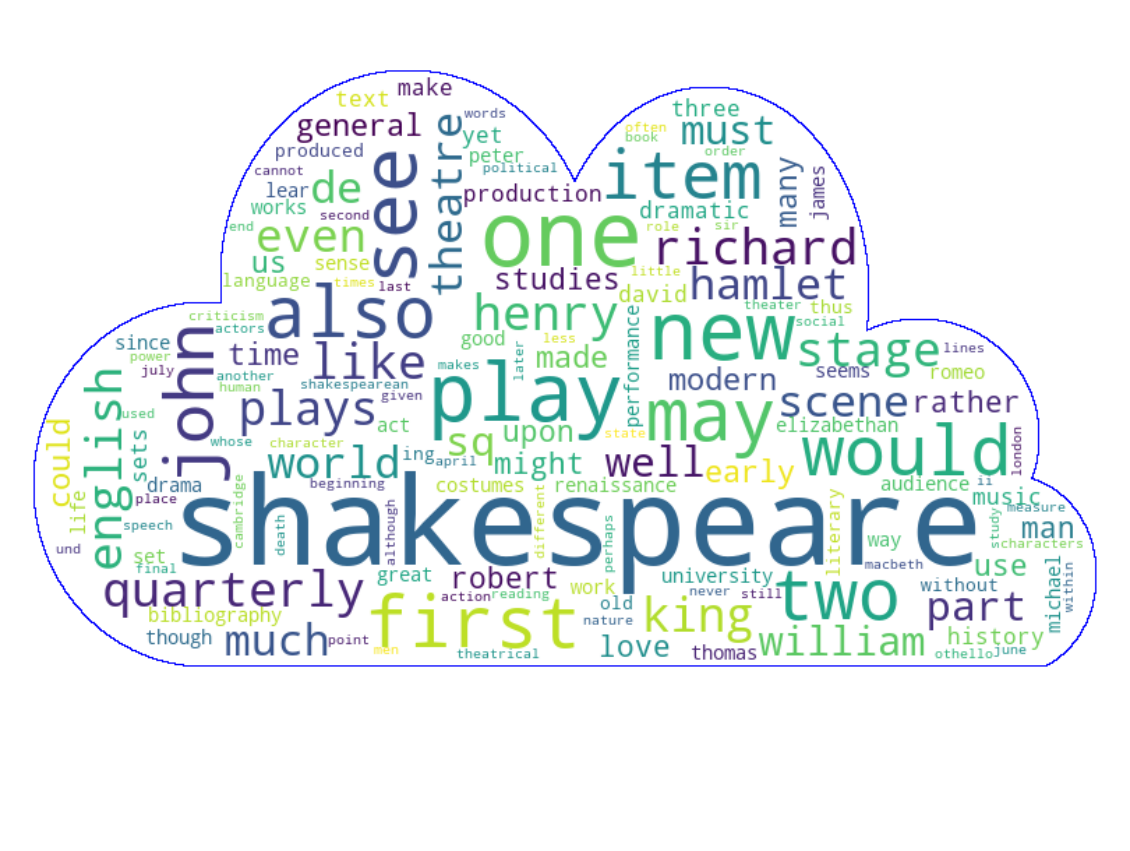

In [39]:
# Create a wordcloud from our data

# Adding a mask shape of a cloud to your word cloud
# By default, the shape will be a rectangle
# You can specify any shape you like based on an image file
cloud_mask = np.array(Image.open('./data/sample_cloud.png')) # Specifies the location of the mask shape
cloud_mask = np.where(cloud_mask > 3, 255, cloud_mask) # this line will take all values greater than 3 and make them 255 (white)


wordcloud = WordCloud(
    width = 800, # Change the pixel width of the image if blurry
    height = 600, # Change the pixel height of the image if blurry
    background_color = "white", # Change the background color
    colormap = 'viridis', # The colors of the words, see https://matplotlib.org/stable/tutorials/colors/colormaps.html
    max_words = 150, # Change the max number of words shown
    min_font_size = 4, # Do not show small text
    
    # Add a shape and outline (known as a mask) to your wordcloud
    contour_color = 'blue', # The outline color of your mask shape
    mask = cloud_mask, # 
    contour_width = 1
).generate_from_frequencies(word_frequency)

mpl.rcParams['figure.figsize'] = (20,20) # Change the image size displayed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")